Home Work 2 (KNN)
Task 4

    1) Методы ближайших соседей

    1.1. Подключитесь к одному из наборов данных на Kaggle: Online News Popularity. Разберитесь в том, как устроен ваш датасет и какова постановка задачи.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_csv('OnlineNewsPopularityReduced.csv', sep =',')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2014/09/28/jobs-tech-workers/,101,12,332,0.528481,1.0,0.645833,6,3,1,...,0.100000,0.7,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121,8600
1,http://mashable.com/2014/09/28/obama-says-u-s-...,101,10,393,0.518817,1.0,0.596899,14,1,1,...,0.250000,0.8,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000,23700
2,http://mashable.com/2014/09/28/once-upon-a-tim...,101,13,1643,0.388854,1.0,0.546967,29,4,7,...,0.033333,0.8,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,8400
3,http://mashable.com/2014/09/28/the-simpsons-de...,101,9,272,0.488889,1.0,0.512690,2,2,11,...,0.100000,1.0,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000,4800
4,http://mashable.com/2014/09/28/viola-davis-les...,101,12,0,0.000000,0.0,0.000000,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560,3100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            4954 non-null   object 
 1   timedelta                      4954 non-null   int64  
 2   n_tokens_title                 4954 non-null   int64  
 3   n_tokens_content               4954 non-null   int64  
 4   n_unique_tokens                4954 non-null   float64
 5   n_non_stop_words               4954 non-null   float64
 6   n_non_stop_unique_tokens       4954 non-null   float64
 7   num_hrefs                      4954 non-null   int64  
 8   num_self_hrefs                 4954 non-null   int64  
 9   num_imgs                       4954 non-null   int64  
 10  num_videos                     4954 non-null   int64  
 11  average_token_length           4954 non-null   float64
 12  num_keywords                   4954 non-null   i

In [4]:
df.describe(include = 'all')

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,4954,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,...,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000,4954.000000
unique,4954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,http://mashable.com/2014/09/28/jobs-tech-workers/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.628381,11.201857,550.405733,0.478429,0.901494,0.616601,10.355874,2.677634,3.572467,...,0.086668,0.696986,-0.251748,-0.527945,-0.097392,0.295246,0.062419,0.338684,0.160434,3340.911183
std,NaN,22.589941,2.182106,457.900604,0.180073,0.298028,0.220690,12.529856,3.402775,5.979075,...,0.069650,0.305969,0.140502,0.317784,0.095186,0.328431,0.272434,0.187267,0.228852,9182.718830
min,NaN,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,5.000000
25%,NaN,30.000000,10.000000,256.000000,0.445631,1.000000,0.608315,3.000000,1.000000,1.000000,...,0.050000,0.500000,-0.331006,-0.800000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.250000
50%,NaN,50.000000,11.000000,436.000000,0.515556,1.000000,0.671141,7.000000,2.000000,1.000000,...,0.100000,0.800000,-0.251427,-0.500000,-0.100000,0.200000,0.000000,0.500000,0.037500,1400.000000
75%,NaN,68.000000,13.000000,753.750000,0.579986,1.000000,0.731024,13.000000,3.000000,3.000000,...,0.100000,1.000000,-0.178616,-0.300000,-0.050000,0.500000,0.136364,0.500000,0.250000,2700.000000


Датасет имеет 61 признак. Цель - shares. Основная задача - по данным определить популярность статьи

    1.2 Извлеките целевой признак (target). Какая из задач обучения с учителем рассмат ривается –– классификация или регрессия?

In [5]:
df.shares

0        8600
1       23700
2        8400
3        4800
4        3100
        ...  
4949     1800
4950     1900
4951     1900
4952     1100
4953     1300
Name: shares, Length: 4954, dtype: int64

Так как унас целевой признак числовой то это задача регрессии

    1.3 Каково распределение значений target-переменной? Постройте подходящую визуализацию. Прокомментируйте результат.

Как можно увидеть, день недели, когда пользователи делятся статьей в среднем больше всего в понедельник. В среднем на понедельник приходится 4144 распростронения среди пользователей.

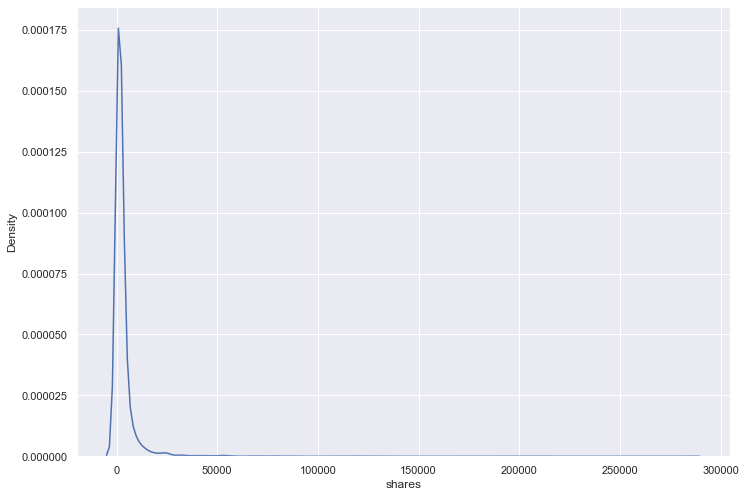

In [6]:
sns.kdeplot(df.shares);

По этому графику мало что можно понять. Поэтому данные нужно нормализировать.

In [7]:
from scipy.stats import normaltest
import numpy as np

df['shares_log'] = np.log(df.shares)
stat, p = normaltest(df.shares_log)
df = df.drop(columns = ['shares'])
print(stat)
print(p)

972.9481369867426
5.333305534977436e-212


Значение p-value меньше порогового (0.05), что свидетельствует о том, что нулевая гиптеза будет опровергнута. Что означает, распределение логарифмов не будет нормальным, а распределение целевой функции - логонормальным.

Следовательно, распределение target'а будет гамма-распределением, по моему мнению.

    1.4 Проведите необходимую предобработку данных (preprocessing). Для построения моделей с помощью метрических методов все признаки должны быть закодированы числами.

In [8]:
df = df.drop(columns = ['url'])
df.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares_log
0,101,12,332,0.528481,1.0,0.645833,6,3,1,1,...,0.100000,0.7,-0.145833,-0.166667,-0.125000,0.718182,0.137121,0.218182,0.137121,9.059517
1,101,10,393,0.518817,1.0,0.596899,14,1,1,0,...,0.250000,0.8,-0.312500,-0.500000,-0.250000,0.500000,0.000000,0.000000,0.000000,10.073230
2,101,13,1643,0.388854,1.0,0.546967,29,4,7,0,...,0.033333,0.8,-0.227778,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,9.035987
3,101,9,272,0.488889,1.0,0.512690,2,2,11,0,...,0.100000,1.0,-0.416667,-1.000000,-0.166667,0.000000,0.000000,0.500000,0.000000,8.476371
4,101,12,0,0.000000,0.0,0.000000,0,0,0,1,...,0.000000,0.0,0.000000,0.000000,0.000000,0.541071,0.067560,0.041071,0.067560,8.039157


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns = ['shares_log'])
y = df['shares_log']

X_1 = scaler.fit_transform(X)
X_1

array([[ 2.2743222 ,  0.36580414, -0.47702007, ...,  0.27422906,
        -0.64354223, -0.10187929],
       [ 2.2743222 , -0.55083405, -0.34378994, ..., -0.2291399 ,
        -1.80874145, -0.70110989],
       [ 2.2743222 ,  0.82412323,  2.3863357 , ..., -0.2291399 ,
         0.86150677, -0.70110989],
       ...,
       [-1.84296997, -0.55083405, -0.23676902, ...,  0.27144801,
        -1.56599161, -0.10518996],
       [-1.84296997, -2.38411043,  0.28741511, ..., -0.2291399 ,
         0.86150677, -0.70110989],
       [-1.84296997, -0.55083405, -0.85923766, ...,  0.68860462,
        -0.91865871,  0.39140998]])

    1.5 Разбейте набор данных на обучающую и валидационную (тестовую) выборки с помощью метода train_test_split .

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_1, y, test_size=0.25, random_state=42)

    1.6 Обучите алгоритм классификации kNeighborsClassifier или регрессии KNeighborsRegressor . Оцените качество каждой модели на валидационной выборке.

In [11]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
from sklearn.metrics import mean_squared_error
predict = knn.predict(X_valid)

mean_squared_error(y_valid, predict)

0.8330559781103377

    2 Настройка оптимального числа ближайших соседей в методе kNN


    2.1 Создайте генератор разбиений, который перемешивает выборку перед создани ем блоков. Число блоков n_splits равно 5. Задайте также параметр для воспроизводимости результатов.
    
    Найдите показатель качества модели kNN на кросс-валидации. Подумайте, при емлемо ли использование вашей меры (метрики) качества в данной задаче? При необходимости пересчитайте качество с помощью другой метрики из списка.

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42) # n_splits играет роль K
knn = KNeighborsRegressor()

scores = cross_val_score(knn, X_1, y, cv=kf, scoring='explained_variance')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.02427661 -0.05456262  0.02837988  0.06170398  0.03292991]
Средняя метрика на кросс-валидации: 0.008834908585587553


In [14]:
scores = cross_val_score(knn, X_1, y, cv=kf, scoring='max_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-5.48292266 -4.99577418 -4.38361924 -4.53540978 -5.46267103]
Средняя метрика на кросс-валидации: -4.972079376244504


In [15]:
scores = cross_val_score(knn, X_1, y, cv=kf, scoring='neg_mean_squared_error')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.84092455 -0.82327872 -0.9437767  -0.78454052 -0.85208684]
Средняя метрика на кросс-валидации: -0.8489214679855351


In [16]:
scores = cross_val_score(knn, X_1, y, cv=kf, scoring='r2')
print('Массив значений метрики:', scores)
print('Средняя метрика на кросс-валидации:', np.mean(scores))

Массив значений метрики: [-0.04217387 -0.05887793  0.02137457  0.05870157  0.01925275]
Средняя метрика на кросс-валидации: -0.000344581783386233


    2.2 Осуществите кросс-валидацию модели при числе соседей k ∈ [1;50]. Используйте GridSearchCV . При каком k качество получилось наилучшим? Чему равна эта оценка качества? Постройте график значений метрики в зависимости от k

In [23]:
from sklearn.model_selection import GridSearchCV

knn_params={'n_neighbors': np.arange(1, 51)} # словарь параметров (ключ: набор возможных значений)

knn_grid = GridSearchCV(knn, knn_params, cv=kf, scoring='explained_variance', n_jobs = -1)
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(n_jobs=-1, n_neighbors=18,
                                           weights='distance'),
             n_jobs=-1,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             scoring='explained_variance')

In [24]:
knn_grid.cv_results_

{'mean_fit_time': array([0.00745482, 0.02166514, 0.01617632, 0.00783753, 0.00838199,
        0.00403557, 0.01179237, 0.00611544, 0.00768661, 0.00793738,
        0.00616479, 0.00915456, 0.0078886 , 0.01453052, 0.00993495,
        0.00842967, 0.00820704, 0.01337004, 0.00814524, 0.01446519,
        0.01188693, 0.00594893, 0.00806346, 0.00573735, 0.00973978,
        0.00895715, 0.00811386, 0.00936198, 0.00415535, 0.00834036,
        0.01428227, 0.00923166, 0.00589089, 0.0041276 , 0.00465536,
        0.00806489, 0.01372056, 0.00394363, 0.01052918, 0.01046619,
        0.00422215, 0.00690241, 0.01191754, 0.00346265, 0.01332026,
        0.00469861, 0.00424461, 0.00596437, 0.00860419, 0.00894027]),
 'std_fit_time': array([4.55162750e-03, 1.79043791e-02, 1.42764047e-02, 8.64972565e-03,
        7.82165865e-03, 6.86043568e-05, 9.60645027e-03, 4.70980838e-03,
        7.74616548e-03, 8.10076565e-03, 4.64107193e-03, 9.50921249e-03,
        8.04656911e-03, 1.26038114e-02, 9.68009255e-03, 8.91964139e-0

In [26]:
print("Найлучшее качество модели при k =", knn_grid.best_params_.get('n_neighbors'))
print("Наилучшая оценка качества модели:", knn_grid.best_score_)

Найлучшее качество модели при k = 35
Наилучшая оценка качества модели: 0.12523045126857152


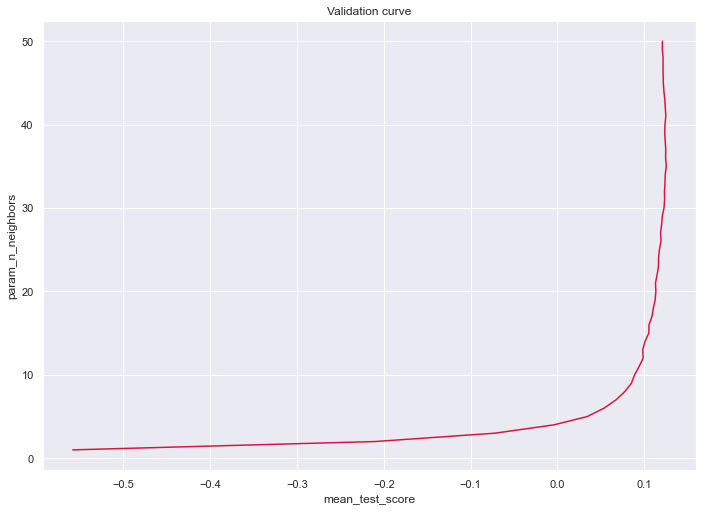

In [29]:
results_df = pd.DataFrame(knn_grid.cv_results_)
h = 'mean_test_score' # правильность
v = 'param_n_neighbors' #количество соседей
plt.plot(results_df[h], results_df[v], color="crimson")

plt.xlabel(h)
plt.ylabel(v)
plt.title('Validation curve')
plt.show()

    3 Выбор метрики в методе kNN

    3.1 Переберите разные варианты значений параметра p по сетке от 1 до 10 с та ким шагом, чтобы всего было протестировано 200 вариантов (удобно использо вать функцию numpy.linspace ). Используйте KNeighborsClassifier или KNeighborsRegressor с оптимальным значением , найденным ранее. Задайте опцию –– данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества снова используйте accuracy . Качество оценивайте с помо щью кросс-валидации по 5 блокам.

In [38]:
p_params = {'p': np.linspace(1, 10, num = 20)}

In [39]:
# weights='distance' –– добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей
knn1 = KNeighborsRegressor(n_neighbors=18, weights='distance', n_jobs = -1)
knn1

KNeighborsRegressor(n_jobs=-1, n_neighbors=18, weights='distance')

In [40]:
knn1_grid = GridSearchCV(knn1, p_params, cv=kf, scoring='explained_variance', n_jobs = -1)
knn1_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsRegressor(n_jobs=-1, n_neighbors=18,
                                           weights='distance'),
             n_jobs=-1,
             param_grid={'p': array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])},
             scoring='explained_variance')

In [41]:
knn1_grid.cv_results_

{'mean_fit_time': array([0.00801697, 0.03353114, 0.00382919, 0.0030272 , 0.00444288,
        0.00724416, 0.01461959, 0.00832071, 0.00713029, 0.00306344,
        0.00790453, 0.00365009, 0.00358949, 0.00412297, 0.04424615,
        0.00373564, 0.00313888, 0.00336409, 0.01543336, 0.01267333]),
 'std_fit_time': array([0.00301475, 0.03952511, 0.00076068, 0.00016526, 0.00193276,
        0.00820317, 0.01739731, 0.01018438, 0.00833508, 0.00015022,
        0.00899328, 0.00092262, 0.00069297, 0.00090916, 0.05173991,
        0.00078903, 0.00029905, 0.00047484, 0.01516073, 0.01080605]),
 'mean_score_time': array([0.63867264, 6.48214045, 5.96935802, 4.9396204 , 6.20741787,
        5.37268777, 5.84582739, 5.4975625 , 5.06971431, 5.48582921,
        5.85680041, 6.18183212, 6.92323112, 7.52505383, 8.52971444,
        8.83478136, 7.76043029, 5.41496677, 5.74929581, 4.67361522]),
 'std_score_time': array([0.05267925, 0.08525756, 0.79675982, 0.04235286, 0.54508906,
        0.113156  , 0.22867796, 0.459871

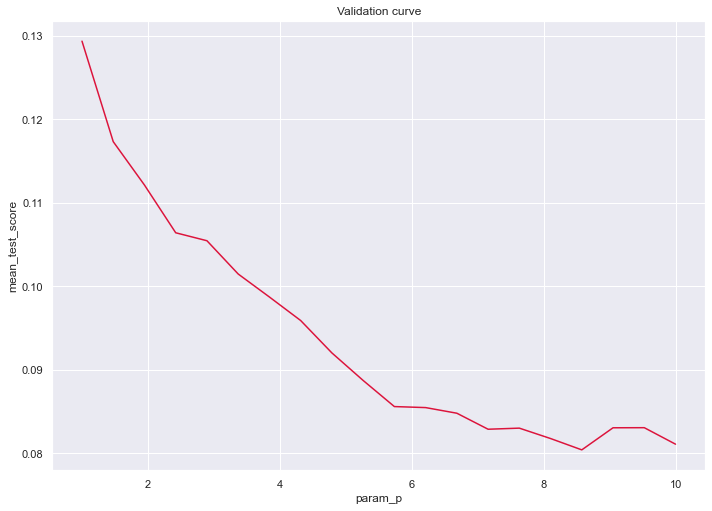

In [42]:
cv_results = pd.DataFrame(knn1_grid.cv_results_)
v = 'mean_test_score'
h = 'param_p'
plt.plot(cv_results[h], cv_results[v], color="crimson")

plt.xlabel(h)
plt.ylabel(v)
plt.title('Validation curve')
plt.show()

    3.2 Определите, при каком p качество на кросс-валидации оказалось оптимальным. Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей.

In [1]:
print("Наилучшая оценка качества модели: ", knn1_grid.best_score_ )

NameError: name 'knn1_grid' is not defined

    4 Другие метрические методы

    Поэкспериментируйте с другими метрическими методами для задач регрессии и клас сификации, представленными в библиотеке Scikit-learn:
    •RadiusNeighborsClassifier; 
    •RadiusNeighborsRegressor; 
    •NearestCentroid .

In [37]:
from sklearn.neighbors import RadiusNeighborsRegressor
#берем большой радиус, что у всех точно были соседи и мы не столкнулись с nan
rnn = RadiusNeighborsRegressor(radius = 50, n_jobs = -1)
rnn.fit(X_train, y_train)

RadiusNeighborsRegressor(n_jobs=-1, radius=50)

In [34]:
y_pred = rnn.predict(X_valid)
y_pred

array([7.46481002, 7.46481002, 7.46481002, ..., 7.46481002, 7.46481002,
       7.46481002])

In [35]:
rnn.score(X_valid, y_valid)

-0.0008010031705349974

In [36]:
mean_squared_error(y_valid, y_pred)

0.7873866919258673